# Notebook basics

Navigation in Jupyter notebooks can be tricky. If you are in *command mode* (not editing a cell), lots of keyboard shortcuts are active, like "`j`" and "`k`" for scrolling, "`a`" for inserting a cell, or "`dd`" for deleting one (these should be familiar if you know `vi`). If you want to type in a cell, make sure to be in *edit mode* by checking you see a blinking cursor. 

  * To go to edit mode, press Enter or double click a cell.
  * To go back to command mode, press Esc or single click another cell.

<a id="toc"></a>

# Table of contents

* [Numpy](#numpy)
* [Plotting](#matplotlib)
* [Units](#units)
* [Sky coordinates](#skycoord)
* [Virtual Observatory (pyvo)](#pyvo)
* [Barnard's star](#barnard)

<a id="numpy"></a>

# Numpy and speed

([back to table of contents](#toc))

In [1]:
import numpy as np

Let's create a huge-ish numpy array with some numbers:

In [2]:
x = np.linspace(0, 1, 1000)

In [3]:
%%timeit
y = np.sin(x)

7.27 µs ± 987 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


(The `%%timeit`` magic command runs the command a few times; for slower commands you may want to use just `%time` so it will only once.)

In [4]:
%%timeit
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = np.sin(x[i])

1.68 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


You should see that the loop version is more than a factor 100 slower. This is because python brings quite an overhead in converting types. In the numpy version, the actual loop is done in C, and thus very efficient.

### Broadcasting rules

To avoid loops in python, it's useful to know the numpy broadcasting rules. Adding `np.array`s of different shapes can sometimes work. Let's first play a bit:

In [2]:
vec = np.ones((5))

In [3]:
vec.shape

(5,)

In [4]:
mat = np.ones((5,5))

In [5]:
mat.shape

(5, 5)

**Question**: will this work? What would the answer be?

In [6]:
vec + mat

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

 * NumPy compares the shapes element-wise, starting with the trailing dimension
 * Two dimensions are compatible if they are equal or one of them is 1
 * Raises a ValueError: frames are not aligned if the shapes are incompatible
 * The size of a successfully broadcasted array is the maximum size along each dimension of the input arrays

**Exercise**: Adjust the example above to show the first two broadcasting rules.

As an illustration, let's read some LOFAR antenna positions. For reference, I did this with the following command which will only work if you have python-casacore installed:
```python
import casacore.tables as pt
positions = pt.taql("SELECT POSITION FROM ~/small.MS::ANTENNA").getcol("POSITION")
```
And for more reference, the following would have done the same:
```python
from lofarantpos.db import LofarAntennaDatabase
db = LofarAntennaDatabase()
positions = np.array(list(db.phase_centres.values()))
```

In [7]:
positions = np.array([[3826896.235,460979.455,5064658.203],[3826979.384,460897.597,5064603.189],[3826600.961,460953.402,5064881.136],[3826565.594,460958.11,5064907.258],[3826471.348,461000.138,5064974.201],[3826517.812,461035.258,5064936.15],[3826585.626,460865.844,5064900.561],[3826579.486,460917.48,5064900.502],[3826701.16,460989.25,5064802.685],[3826631.194,461021.815,5064852.259],[3826653.783,461136.44,5064824.943],[3826612.499,461080.298,5064861.006],[3826478.715,461083.72,5064961.117],[3826538.021,461169.731,5064908.827],[3826637.421,461227.345,5064829.134],[3826648.961,461354.241,5064809.003],[3826405.095,461507.46,5064978.083],[3826499.783,461552.498,5064902.938],[3826463.502,460533.094,5065022.614],[3826368.813,460488.057,5065097.759],[3827218.193,461403.898,5064378.79],[3827123.504,461358.861,5064453.935],[3826418.227,461805.837,5064941.199],[3826335.078,461887.696,5064996.213],[3825573.134,461324.607,5065619.039],[3825656.283,461242.749,5065564.025],[3826041.577,460323.374,5065357.614],[3825958.428,460405.233,5065412.628],[3826383.037,460279.343,5065105.85],[3826477.725,460324.381,5065030.705],[3826864.262,460451.924,5064730.006],[3826947.411,460370.066,5064674.992],[3825899.977,461698.906,5065339.205],[3825805.288,461653.869,5065414.35],[3826331.59,462759.074,5064919.62],[3826248.441,462840.933,5064974.634],[3826679.281,461855.243,5064741.38],[3826690.821,461982.139,5064721.249],[3827442.564,461050.814,5064242.391],[3827431.025,460923.919,5064262.521],[3827973.226,459728.624,5063975.3],[3827890.077,459810.483,5064030.313],[3826795.752,460158.894,5064808.929],[3826784.211,460031.993,5064829.062],[3825568.82,460647.62,5065683.028],[3825663.508,460692.658,5065607.883],[3829205.598,469142.533,5062181.002],[3831479.67,463487.529,5060989.903],[3847753.31,466962.809,5048397.244],[3828732.721,454692.421,5063850.334],[3829771.249,452761.702,5063243.181],[3837964.52,449627.261,5057357.585],[3845376.29,413616.564,5054796.341],[3818424.939,452020.269,5071817.644],[3811649.455,453459.894,5076728.952],[3824812.621,426130.33,5069251.754],[3824138.566,459476.972,5066858.578],[3797136.484,463114.447,5086651.286],[3783537.525,450130.064,5097866.146]])

In [8]:
positions.shape

(59, 3)

The second broadcasting rule, that uses the fact whether a dimension is 1, can be used to your advantage. Sometimes it's necessary to add a dimension to an existing array to make the broadcasting rules work for you.
It's possible to add a dummy axis by using `np.newaxis` in indexing.

In [9]:
positions[np.newaxis, :, :].shape

(1, 59, 3)

**Exercise**: use the `-` operator on `positions` to get the vectors between all pairs of LOFAR stations. This should be an array of shape (59, 59, 3). If you want, use `np.linalg.norm(..., axis=2)` on that to get the length of all baselines.

In [13]:
%%timeit
np.linalg.norm(positions[np.newaxis, :, :] - positions[:, np.newaxis, :], axis=2);

200 µs ± 45.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Exercise**: implement this with a loop and check how much slower it is.

In [14]:
dist = np.zeros((len(positions), len(positions)), dtype=np.float)

In [15]:
%%timeit
for ant1 in range(len(positions)):
    for ant2 in range(len(positions)):
        dist[ant1, ant2] = np.linalg.norm(positions[ant1] - positions[ant2])

18.5 ms ± 874 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


<a id="matplotlib"></a>

# Proper plotting (no pylab, use fig, ax, subplots)

([back to table of contents](#toc))

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

The `%matplotlib inline` sets up `matplotlib` to put the output as PNG into the notebook. To make it more interactive, use `%matplotlib notebook` to make javascript-based plots that you can interact with in your browser. If you want to know, you can use `%matplotlib --list` to see the options. Or if you forget this, remember `?%matplotlib`.

From now on, please never use `from pylab import *` anymore, as [recommended](https://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related) by its authors.

Matplotlib has [two ways](https://matplotlib.org/faq/usage_faq.html#coding-styles) to make plots. The MATLAB-like way is to use `plt.plot(np.sin(np.linspace(0,5,100)))`. We prefer the object-oriented way because it's more pythonic and shows a bit clearer what's going on:

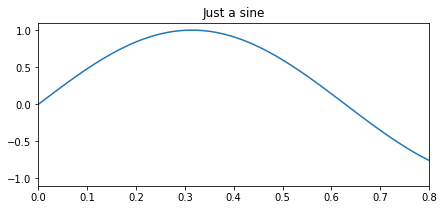

In [11]:
fig, ax = plt.subplots(figsize=(7,3));
ax.set_xlim([0,0.8])
ax.plot(np.linspace(0,1,100), np.sin(5*np.linspace(0,1,100)));
ax.set_title("Just a sine");

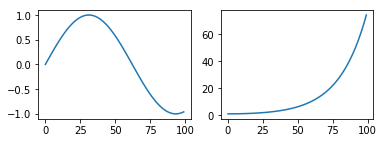

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,2));
ax1.plot(np.sin(np.linspace(0,5,100)));
ax2.plot(np.cosh(np.linspace(0,5,100)));

As recommended by the authors, if you repeat plots it can be useful to make a function that does the plotting for you, given some input parameter that you want to change.

<a id="units"></a>

# Units and quantities

([back to table of contents](#toc))

Astropy has built-in support for [units](http://docs.astropy.org/en/stable/units/), and converting between them. Also, the `astropy.constants` holds useful constants, which of course usually have a unit.

In [13]:
import astropy.units as u

In [14]:
from astropy.constants import c as speed_of_light
from astropy.constants import m_e as electron_mass

In [21]:
electron_mass

<<class 'astropy.constants.codata2014.CODATA2014'> name='Electron mass' value=9.10938356e-31 uncertainty=1.1e-38 unit='kg' reference='CODATA 2014'>

This thing is a `Quantity`, which has a unit and a value.

In [22]:
isinstance(electron_mass, u.quantity.Quantity)

True

In [23]:
electron_mass.value

9.10938356e-31

In [24]:
electron_mass.unit

Unit("kg")

Declaring your own quantity is done like this:

In [15]:
tammo_mass = 78 * u.kg

**Exercise**: Type `u.` and use tab-completion to find the unit for astronomical unit.

Of course it's possible to convert to other units:

In [16]:
speed_of_light.to(u.km / u.h)

<Quantity 1.07925285e+09 km / h>

A useful abbreviation is the attribute `.si` which gives a quantity in SI-units.

**Exercise**: Use `astropy.units` to compute the light travel time from the Sun to Earth in minutes.

In [17]:
(1 * u.AU / speed_of_light).to(u.min)

<Quantity 8.3167464 min>

**Exercise**: how many atomic masses does your favorite tutor weigh? (Atomic mass: `u.u`)

In [28]:
tammo_mass.to(u.u)

<Quantity 4.69726987e+28 u>

**Exercise**: convert $\mathrm{50\,\mathrm{Jansky}}$ to $\mathrm{erg}/\mathrm{cm}^2$

In [18]:
(50*u.Jy).to(u.erg/u.cm**2)

<Quantity 5.e-22 erg / cm2>

### Equivalencies

Some units are not convertible by default. An example is `MHz` and `cm`, although we all know how to convert those.

Astropy does not, by default:

In [30]:
(21.106*u.cm).to(u.MHz)

UnitConversionError: 'cm' (length) and 'MHz' (frequency) are not convertible

**Exercise**: Use `speed_of_light` and unit conversion to find the frequency in `MHz` that corresponds to `21.106 cm`

In [19]:
(speed_of_light / (21.106*u.cm)).to(u.MHz)

<Quantity 1420.41342746 MHz>

With an "equivalency" for the function `.to()`, astropy does know how to convert these:

In [20]:
(21.106*u.cm).to(u.MHz, equivalencies=u.spectral())

<Quantity 1420.41342746 MHz>

Another useful equivalency:

In [21]:
(1421.01*u.MHz).to(u.km/u.s, equivalencies=u.doppler_radio(rest=21.106*u.cm))

<Quantity -125.9126 km / s>

It is possible to enable one (only one I think..) equivalency globally.
    

In [29]:
u.cm.find_equivalent_units()

  Primary name | Unit definition | Aliases                         
[
  AU           | 1.49598e+11 m   | au, astronomical_unit            ,
  Angstrom     | 1e-10 m         | AA, angstrom                     ,
  cm           | 0.01 m          | centimeter                       ,
  earthRad     | 6.3781e+06 m    | R_earth, Rearth                  ,
  jupiterRad   | 7.1492e+07 m    | R_jup, Rjup, R_jupiter, Rjupiter ,
  lyr          | 9.46073e+15 m   | lightyear                        ,
  m            | irreducible     | meter                            ,
  micron       | 1e-06 m         |                                  ,
  pc           | 3.08568e+16 m   | parsec                           ,
  solRad       | 6.957e+08 m     | R_sun, Rsun                      ,
]

In [30]:
u.set_enabled_equivalencies(u.spectral())

In [31]:
u.cm.find_equivalent_units()

  Primary name | Unit definition        | Aliases                         
[
  AU           | 1.49598e+11 m          | au, astronomical_unit            ,
  Angstrom     | 1e-10 m                | AA, angstrom                     ,
  Bq           | 1 / s                  | becquerel                        ,
  Ci           | 3.7e+10 / s            | curie                            ,
  Hz           | 1 / s                  | Hertz, hertz                     ,
  J            | kg m2 / s2             | Joule, joule                     ,
  Ry           | 2.17987e-18 kg m2 / s2 | rydberg                          ,
  cm           | 0.01 m                 | centimeter                       ,
  eV           | 1.60218e-19 kg m2 / s2 | electronvolt                     ,
  earthRad     | 6.3781e+06 m           | R_earth, Rearth                  ,
  erg          | 1e-07 kg m2 / s2       |                                  ,
  jupiterRad   | 7.1492e+07 m           | R_jup, Rjup, R_jupiter, Rjupiter ,

In [32]:
(23*u.cm).to(u.MHz)

<Quantity 1303.44546957 MHz>

A more proper way to enable more equivalencies is to embed them in a `with` statement:

In [33]:
with u.set_enabled_equivalencies(u.spectral()):
    with u.set_enabled_equivalencies(u.doppler_radio(rest=21.106*u.cm)):
        print((-125*u.km/u.s).to(u.cm)) # This is scary

21.0972034130404 cm


**Exercise**: Explain why the example above is scary.

And another equivalency that may be useful:

In [35]:
beam_sigma = 50*u.arcsec
beam_area = 2*np.pi*(beam_sigma)**2
(1*u.Jy/beam_area).to(u.K, equivalencies=u.brightness_temperature(5*u.GHz))

<Quantity 3.52629514 K>

Recall the Rayleigh-Jeans law: $B_{\lambda} (T) = \frac{2 \cdot c \cdot k_{\mathrm{B}} \cdot T}{\lambda^4}$, where $B_{\lambda}$ is the  spectral radiance; the power emitted per unit emitting area, per steradian, per unit wavelength, $c$  is the speed of light, $k_{\mathrm{B}}$ is the Boltzmann constant and $T$ is the temperature in kelvins.

**Exercise**: implement the function `rayleigh_jeans(lamda, t)` that for a given wavelength and temperature, returns the spectral radiance, with appropriate units. (We'll use `lamda` here because `lambda` is a reserved word in Python.)

*Hint*: use tab completion on `astropy.constants.` to find available constants.

In [36]:
from astropy.constants import k_B

In [39]:
def rayleigh_jeans(lamda, t):
    return (2 * speed_of_light * k_B * t) / lamda**4

**Exercise**: plot this function at $T=30\mathrm{K}$ for $\lambda \in (10\mathrm{cm}, 1\mathrm{m})$

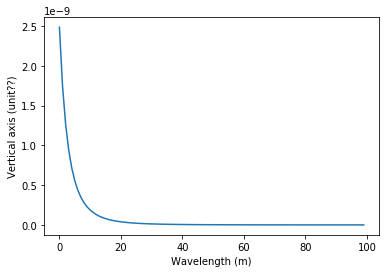

In [40]:
fig, ax = plt.subplots();
ax.plot(rayleigh_jeans(np.linspace(0.1, 1, 100)*u.m, 30*u.K));
ax.set_xlabel("Wavelength (m)");
ax.set_ylabel("Vertical axis (unit??)");

Astropy has a way to add unit support to matplotlib plots:

In [37]:
from astropy.visualization import quantity_support

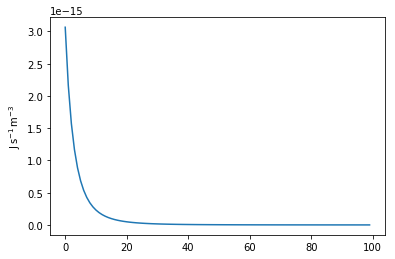

In [42]:
plt.figure()
with quantity_support():
    plt.plot(rayleigh_jeans(np.linspace(3, 30, 100)*u.m, 30*u.K))

It can get more fancy by using the function decorator `u.quantity_input` which understands the unit of input for your function. In this way, you can specify the arguments to your function with a different unit (e.g. `km` instead of `m`) and astropy will do the conversion for you.

In [43]:
@u.quantity_input(lamda=u.m, t=u.K)
def rayleigh_jeans(lamda, t):
    return (2 * speed_of_light * k_B * t) / lamda**4

In [44]:
rayleigh_jeans(50*u.MHz, 300*u.K).si

<Quantity 3.97351693e-43 kg m3 s>

Note that typing `u.m` everywhere will cause some overhead, but it might save you a few days of debugging a case where you forgot which unit you used.

## Time

Astropy has good support for times and dates. As you know, there is only one good way to format time: [ISO8601](https://xkcd.com/1179/). To convert to and from this, use `astropy.time`.

In [38]:
from astropy.time import Time

In [39]:
t = Time("2019-03-13T11:30")

In [47]:
t.isot

'2019-03-13T11:30:00.000'

In [48]:
t.mjd

58555.479166666664

In [49]:
t.unix

1552476600.0000002

In [50]:
t = Time.now()

In [51]:
t.unix

1551782042.7876122

In [40]:
t = Time(1551733900, format='unix')

In [41]:
t.isot

'2019-03-04T21:11:40.000'

**Exercise**: How many seconds were there between `1997-01-01 00:00` UTC and `2000-01-01 00:00` UTC?

In [42]:
(Time("2000-01-01 00:00") - Time("1997-01-01 00:00")).to(u.s)

<Quantity 94608002. s>

In [43]:
3*365*24*3600

94608000

**Exercise**: How many leap seconds have there been in your life? (It's ok to assume it's less than 100.)

In [46]:
(Time("2019-01-01") - Time("1981-01-01")).to(u.s).value%100

18.0

## Angles

A special case of units are angles, not unimportant in astronomy. Of course normal angles 'just work', though they're not very smart (don't take care of unwrapping):

In [47]:
365*u.deg

<Quantity 365. deg>

In [48]:
(135*u.deg).to(u.rad)

<Quantity 2.35619449 rad>

In [49]:
np.deg2rad(135*u.rad)

<Quantity 135. rad>

Note that what happened here is bit scary: astropy 'patched' the function `np.deg2rad` to be type-aware, and the argument got converted to degrees before it entered the function.

To input sexagesimal angles, use `Angle` to make it format nicely automatically.

In [50]:
from astropy.coordinates import Angle

In [51]:
ra = Angle("8h34m5.54s")
ra

<Angle 8.56820556 hourangle>

In [52]:
dec = Angle("-45d50m0s")
dec

<Angle -45.83333333 deg>

In [53]:
ra.hms

hms_tuple(h=8.0, m=34.0, s=5.540000000001868)

In [54]:
dec.dms

dms_tuple(d=-45.0, m=-50.0, s=-8.526512829121202e-12)

In [55]:
dec.signed_dms

signed_dms_tuple(sign=-1.0, d=45.0, m=50.0, s=8.526512829121202e-12)

<a id="skycoord"></a>

# Sky coordinates

([back to table of contents](#toc))

In [56]:
from astropy.coordinates import SkyCoord

Coordinates on the sky are of course `SkyCoord`s. You can make one as follows:

In [57]:
my_obj = SkyCoord(ra=ra, dec=dec)

The default frame is ICRS, which is about the same as J2000.

Many convenience methods are available for SkyCoord. The best is for tutorials is `from_name`, which gets you an object by querying simbad.

In [58]:
polaris = SkyCoord.from_name("polaris")

In [59]:
polaris.ra

<Longitude 37.95456067 deg>

In [60]:
polaris.dec

<Latitude 89.26410897 deg>

In [61]:
polaris.separation(my_obj)

<Angle 135.83576978 deg>

In [62]:
polaris.galactic

<SkyCoord (Galactic): (l, b) in deg
    (123.28054967, 26.46139598)>

In [63]:
gal_center = SkyCoord(l=0*u.deg, b=0*u.deg, frame="galactic")

**Exercise**: how many radians is the galactic center from M31?

In [64]:
gal_center.separation(SkyCoord.from_name("M31")).to(u.rad)

<Angle 2.07302669 rad>

<a id="pyvo"></a>

## Convert sky coordinates to Azimuth / Elevation

([back to table of contents](#toc))

In [150]:
from astropy.coordinates import EarthLocation, AltAz, ICRS

In [68]:
dwl = EarthLocation(lat=52*u.deg, lon=6*u.deg)

Alternatively, you can use the convenience function `of_address`. This only works from astropy 3.1 which uses OpenStreetMap, the older versions use the Google maps API which was shut down mid 2018.

In [72]:
EarthLocation.of_address("Dwingeloo, Oude Hoogeveensedijk 4")

<EarthLocation (3839196.75293548, 430354.94831138, 5058020.76777722) m>

More alternatively, use `of_site`, which contains coordinates of some well-known observatories. This list can be inspected with `EarthLocation.get_site_names()`.

**Exercise**: make a pull request to Astropy to include some ASTRON telescopes here.

An AltAz frame requires a place and a time.

In [74]:
AltAz(obstime=Time.now(), location=dwl)

<AltAz Frame (obstime=2019-03-05 11:51:31.008526, location=(3913404.34151726, 411315.37060055, 5002803.34548264) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

To convert to such a frame, use the `.transform_to` method of a `SkyCoord`:

In [79]:
gal_altaz = gal_center.transform_to(AltAz(obstime=Time.now(), location=dwl))

In [80]:
gal_altaz.alt

<Latitude -16.93304107 deg>

In [81]:
gal_altaz.az

<Longitude 244.40922461 deg>

**Exercise**: Plot the altitude of your favorite source as seen from WSRT over the next 12 hours. *Hint*: for plotting times, python likes them to be converted to `datetime`. So if you have a `Time` object `t`, use `t.datetime` in the plot command.

In [142]:
timespan = Time.now()+np.linspace(0, 12, 100)*u.hour

In [143]:
wsrt = EarthLocation.of_address("Westerbork Synthesis Radio Telescope")

In [144]:
altazframe = AltAz(location=wsrt, obstime=timespan)

In [145]:
m31_altaz = SkyCoord.from_name("M31").transform_to(altazframe)

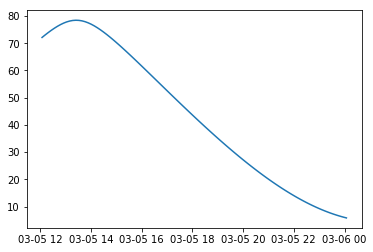

In [146]:
fig, ax = plt.subplots()
ax.plot(timespan.datetime, m31_altaz.alt)

Of course, transforming from `AltAz` to `FK5` is done in a similar manner. FK5 is a frame that more or less corresponds to J2000 but is more accurate.

**Exercise**: where is the Dwingeloo telescope currently pointing in the `FK5` frame? It's parked at 30 deg from south, 30 deg elevation.

In [160]:
AltAz(obstime=Time.now(), location=dwl, alt=30*u.deg, az=210*u.deg).transform_to(FK5)

<FK5 Coordinate (equinox=J2000.000): (ra, dec) in deg
    (326.74124414, -3.14539647)>